In [ ]:
pip install requests PyPDF2 langchain faiss-cpu transformers PyPDF2 pydantic

In [ ]:
pip install -U langchain-community

In [ ]:
pip install sentence-transformers rank_bm25 tavily-python

In [ ]:
!pip install -qU langchain\
    langchain-community\
    langchain-together\
    langchain-core\
    faiss-cpu\
    faiss-gpu\
    langgraph\
    sentence-transformers\
    gradio

### Data Gathering and Making Docs

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://stanford.edu/~jurafsky/slp3/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

chapter_links = [a['href'] for a in soup.find_all('a', href=True)
                 if a['href'].lower().endswith('.pdf') and a['href'][0].isdigit()]

num_chapters = len(chapter_links)

print(f"Number of chapters starting with a number and ending with '.pdf': {num_chapters}")

chapter_links = [url+i for i in chapter_links]
for i in chapter_links:
  print(i)


Number of chapters starting with a number and ending with '.pdf': 21
https://stanford.edu/~jurafsky/slp3/2.pdf
https://stanford.edu/~jurafsky/slp3/3.pdf
https://stanford.edu/~jurafsky/slp3/4.pdf
https://stanford.edu/~jurafsky/slp3/5.pdf
https://stanford.edu/~jurafsky/slp3/6.pdf
https://stanford.edu/~jurafsky/slp3/7.pdf
https://stanford.edu/~jurafsky/slp3/8.pdf
https://stanford.edu/~jurafsky/slp3/9.pdf
https://stanford.edu/~jurafsky/slp3/10.pdf
https://stanford.edu/~jurafsky/slp3/11.pdf
https://stanford.edu/~jurafsky/slp3/13.pdf
https://stanford.edu/~jurafsky/slp3/14.pdf
https://stanford.edu/~jurafsky/slp3/15.pdf
https://stanford.edu/~jurafsky/slp3/16.pdf
https://stanford.edu/~jurafsky/slp3/17.pdf
https://stanford.edu/~jurafsky/slp3/18.pdf
https://stanford.edu/~jurafsky/slp3/19.pdf
https://stanford.edu/~jurafsky/slp3/20.pdf
https://stanford.edu/~jurafsky/slp3/21.pdf
https://stanford.edu/~jurafsky/slp3/22.pdf
https://stanford.edu/~jurafsky/slp3/23.pdf


In [ ]:
from io import BytesIO
import PyPDF2
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document

pdf_urls = chapter_links


raw_documents = []

for url in pdf_urls:
    response = requests.get(url)
    if response.status_code == 200:
        pdf_content = BytesIO(response.content)
        reader = PyPDF2.PdfReader(pdf_content)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
        raw_documents.append(Document(page_content=text, metadata={"source": url}))
    else:
        print(f"Failed to download PDF from {url}")

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
documents = text_splitter.split_documents(raw_documents)

In [ ]:
print(documents[2])

page_content='and other chatbots play a crucial role in natural language processing.
We’ll begin with the most important tool for describing text patterns: the regular
expression . Regular expressions can be used to specify strings we might want to
extract from a document, from transforming “I need X” in ELIZA above, to deﬁning
strings like $199 or$24.99 for extracting tables of prices from a document.
We’ll then turn to a set of tasks collectively called text normalization , in whichtext
normalization
regular expressions play an important part. Normalizing text means converting it
to a more convenient, standard form. For example, most of what we are going to
do with language relies on ﬁrst separating out or tokenizing words from running
text, the task of tokenization . English words are often separated from each other tokenization
by whitespace, but whitespace is not always sufﬁcient. New York androck ’n’ roll
are sometimes treated as large words despite the fact that they contain spa

### embeddings and vectorestore

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.embeddings import CacheBackedEmbeddings
import torch

embedder = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")



/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from langchain.storage import LocalFileStore

store = LocalFileStore("./cache/")

cache_backed_embedder = CacheBackedEmbeddings.from_bytes_store(embedder, store)

db = FAISS.from_documents(documents, cache_backed_embedder)
faiss_retriever = db.as_retriever(search_kwargs={"k": 2})





### Ensemble Retriever

In [ ]:
from langchain.retrievers import EnsembleRetriever, BM25Retriever

bm25_retriever = BM25Retriever.from_documents(documents)

ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, faiss_retriever])

In [ ]:
weights = [(0.3, 0.7), (0.7, 0.3),(0.5, 0.5)]

for bm25_weight, faiss_weight in weights:
    ensemble_retriever.weights = bm25_weight, faiss_weight

    results = ensemble_retriever.invoke("what is  n-gram")
    print('------------------------------------------------')
    print('------------------------------------------------')

    print(f"Weights (BM25: {bm25_weight}, FAISS: {faiss_weight})")
    for i,result in enumerate(results):
        print(i)
        print(result.page_content)

------------------------------------------------
------------------------------------------------
Weights (BM25: 0.3, FAISS: 0.7)
0
language model. An n-gram is a sequence of nwords: a 2-gram (which we’ll
callbigram ) is a two-word sequence of words like “please turn”, “turn your”, or
”your homework”, and a 3-gram (a trigram ) is a three-word sequence of words like
“please turn your”, or “turn your homework”. But we also (in a bit of terminological
ambiguity) use the word ‘n-gram’ to mean a probabilistic model that can estimate
the probability of a word given the n-1 previous words, and thereby also to assign
probabilities to entire sequences.
In later chapters we will introduce the much more powerful neural large lan-
guage models , based on the transformer architecture of Chapter 10. But because n-
grams have a remarkably simple and clear formalization, we begin our study of lan-
guage modeling with them, introducing major concepts that will play a role through-
out language modeling

In [ ]:
ensemble_retriever.weights = 0.3 , 0.7

In [ ]:

sample_queries = [
    "what is a n-gram",  # Relevant query
    "what is bainary tree",  # CS query outside NLP
    "where is nigeria located" # General knowledge query
]

for query in sample_queries:
    results = ensemble_retriever.invoke(query)
    print(f"Query: {query}")
    for result in results:
        print(result.page_content)
    print("-" * 80)

Query: what is a n-gram
language model. An n-gram is a sequence of nwords: a 2-gram (which we’ll
callbigram ) is a two-word sequence of words like “please turn”, “turn your”, or
”your homework”, and a 3-gram (a trigram ) is a three-word sequence of words like
“please turn your”, or “turn your homework”. But we also (in a bit of terminological
ambiguity) use the word ‘n-gram’ to mean a probabilistic model that can estimate
the probability of a word given the n-1 previous words, and thereby also to assign
probabilities to entire sequences.
In later chapters we will introduce the much more powerful neural large lan-
guage models , based on the transformer architecture of Chapter 10. But because n-
grams have a remarkably simple and clear formalization, we begin our study of lan-
guage modeling with them, introducing major concepts that will play a role through-
out language modeling, concepts like training and test sets ,perplexity ,sampling ,
andinterpolation .
3.1 N-Grams
serve as the i

### search engine

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
import os

os.environ["TAVILY_API_KEY"]='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'

tool = TavilySearchResults()

In [ ]:
res = tool.invoke({"query": "What happened in the latest burning man floods"})

In [ ]:
res

[{'url': 'https://abcnews.go.com/US/burning-man-flooding-happened-stranded-festivalgoers/story?id=102908331',
  'content': '"\nTop Stories\nMacy\'s Thanksgiving Day Parade temporarily halted by pro-Palestinian protesters\nGuns N\' Roses singer Axl Rose accused of alleged 1989 sexual assault by former model\nFBI: Rainbow Bridge crash, explosion not connected to terrorism\nToxic chemical spill from Kentucky train derailment forces residents to flee homes\nHezbollah fires rockets at north Israel after an airstrike kills 5 of the group\'s senior fighters\nABC News Live\n24/7 coverage of breaking news and live events ABC News\nVideo\nLive\nShows\nElection 2024\n538\nStream on\nBurning Man flooding: What happened to stranded festivalgoers?\n In response to the unusual weather, event organizers shut down traffic in or out of what is called Black Rock City -- where the festival is held in the desert -- including the local airport.\n MORE: These US regions will experience scorching temperatures

In [ ]:
from langchain_core.documents import Document

def response2doc(res):
  docs = []
  for result in res:
    docs.append(Document(page_content=result['content'], metadata={"source": result['url']}))
  return docs


In [ ]:
search_engine_chain = tool | response2doc
result = search_engine_chain.invoke("where is Nigeria?")
result[0]

Document(metadata={'source': 'https://www.worldatlas.com/maps/nigeria'}, page_content="And Military Leaders Of Nigeria Since Independence\nLatest by WorldAtlas\n10 Small Towns in the Finger Lakes to Visit for a Weekend Getaway\n9 Coziest Small Towns in Kansas\n14 Most Beautiful Small Towns In Wyoming You Should Visit\n13 Best Small Towns in the Great Lakes Region For Retirees\n9 Best Towns In California's Sierra Nevada For A Winter Getaway\n Maps of Nigeria\nNigeria, situated in West Africa, borders the Republic of Benin to the west, Chad and Cameroon to the east, and Niger to the north. As one moves further north, the savanna transitions into the Sahel, a semi-arid zone that acts as a transitional area between the dry Sahara Desert to the north and the savannas to the south. In the southern part of the country, along the coastline, numerous small islands exist, most notably Lagos Island, where the one of Nigeria's largest cities rests.\n The region is also the mainstay of Nigeria's ag

### router chain

In [ ]:
API_key = '141a7d509676349a6e1bc8d00bf6a120437d9970512ccf66f3aa3d9546535678'

In [ ]:
from langchain_together import ChatTogether

llm = ChatTogether(
    together_api_key=API_key,
    model="meta-llama/Llama-3-70b-chat-hf",
    temperature= 0
    )


In [ ]:
from pydantic import BaseModel, Field, validator
from typing import Literal
from langchain.output_parsers import PydanticOutputParser

class ChosenTool(BaseModel):
    tool_name: Literal['None', 'VectorStore', 'SearchEngine'] = Field(description="the tool that was chosen by LLM in question routing stage")


question_router_parser = PydanticOutputParser(pydantic_object=ChosenTool)


format_instructions = question_router_parser.get_format_instructions()
print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"tool_name": {"description": "the tool that was chosen by LLM in question routing stage", "enum": ["None", "VectorStore", "SearchEngine"], "title": "Tool Name", "type": "string"}}, "required": ["tool_name"]}
```


In [ ]:
from langchain.prompts import ChatPromptTemplate

prompt_template = (
    "You are an expert in routing user queries to either a VectorStore, a SearchEngine, or none.\n"
    "Your VectorStore contains data about Natural Language Processing (NLP) and Computer Science (CS).\n"
    "If the given query is about NLP choose VectorStore.\n"
    "If the given query is about CS, choose SearchEngine.\n"
    "If the query is not related to either NLP, CS, or web searching, choose None.\n"
    "Give me only and only the name of the tool you chose and nothing more. If there is no chosen tool, give me back the string 'None'.\n"
    "{output_instructions}\n"
    "query: {query}\n"
)

prompt_chat_template = ChatPromptTemplate.from_template(
    template=prompt_template,
)


In [ ]:
question_router = prompt_chat_template | llm | question_router_parser

res = question_router.invoke({"query": "what is n-gram",
                                   "output_instructions": question_router_parser.get_format_instructions()
 })
res

ChosenTool(tool_name='VectorStore')

In [ ]:
res = question_router.invoke({"query": "what is binary tree",
                                   "output_instructions": question_router_parser.get_format_instructions()
 })
res

ChosenTool(tool_name='SearchEngine')

### relevancy chain


In [ ]:
class relevancy(BaseModel):
    relevancy_ind: Literal['relevant', 'irrelevant'] = Field(description="Is the document relevant to query or not")


In [ ]:
# Initialize the Pydantic output parser
relevancy_parser = PydanticOutputParser(pydantic_object=relevancy)

# Get the format instructions for the parser
relevancy_instructions = relevancy_parser.get_format_instructions()
print(relevancy_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"relevancy_ind": {"description": "Is the document relevant to query or not", "enum": ["relevant", "irrelevant"], "title": "Relevancy Ind", "type": "string"}}, "required": ["relevancy_ind"]}
```


In [ ]:
from langchain.prompts import ChatPromptTemplate

prompt_template_relevancy = (
  "You are an expert in analyzing the relevance of documents to user queries.\n"
  "I will provide you with a document and a query.\n"
  "Determine if the document is relevant to the query based on the content of both.\n"
  "Respond with 'relevant' if the document is related to the query, 'irrelevant' otherwise.\n"
  "{output_instructions}\n"
  "document: {document}\n"
  "query: {query}\n"
)

prompt_chat_template_relevancy = ChatPromptTemplate.from_template(
  template=prompt_template_relevancy
)


In [ ]:
relevancy_chain = prompt_chat_template_relevancy | llm | relevancy_parser

In [ ]:
res = relevancy_chain.invoke({"query": "what is n-gram",
                              "output_instructions": relevancy_parser.get_format_instructions(),
                             "document":
                              '''
                              An n-gram is a sequence of nwords: a 2-gram (which well
                              callbigram ) is a two-word sequence of words like “please turn”, “turn your”, or
                              ”your homework”, and a 3-gram (a trigram ) is a three-word sequence of words like
                              “please turn your”, or “turn your homework”. But we also (in a bit of terminological
                              ambiguity) use the word ‘n-gram’ to mean a probabilistic model that can estimate
                              the probability of a word given the n-1 previous words, and thereby also to assign
                              probabilities to entire sequences.
                              In later chapters we will introduce the much more powerful neural large lan-
                              guage models , based on the transformer architecture of Chapter 10. But because n-
                              grams have a remarkably simple and clear formalization, we begin our study of lan-
                              guage modeling with them, introducing major concepts that will play a role through-
                              out language modeling, concepts like training and test sets ,perplexity ,sampling ,
                              andinterpolation .
                              '''
 })
res


relevancy(relevancy_ind='relevant')

In [ ]:
res = relevancy_chain.invoke({"query": "where is nigeria?",
                              "output_instructions": relevancy_parser.get_format_instructions(),
                             "document":
                              '''
                              An n-gram is a sequence of nwords: a 2-gram (which well
                              callbigram ) is a two-word sequence of words like “please turn”, “turn your”, or
                              ”your homework”, and a 3-gram (a trigram ) is a three-word sequence of words like
                              “please turn your”, or “turn your homework”. But we also (in a bit of terminological
                              ambiguity) use the word ‘n-gram’ to mean a probabilistic model that can estimate
                              the probability of a word given the n-1 previous words, and thereby also to assign
                              probabilities to entire sequences.
                              In later chapters we will introduce the much more powerful neural large lan-
                              guage models , based on the transformer architecture of Chapter 10. But because n-
                              grams have a remarkably simple and clear formalization, we begin our study of lan-
                              guage modeling with them, introducing major concepts that will play a role through-
                              out language modeling, concepts like training and test sets ,perplexity ,sampling ,
                              andinterpolation .
                              '''
 })
res

relevancy(relevancy_ind='irrelevant')

### Fallback

In [ ]:
from operator import itemgetter
from langchain_core.output_parsers import StrOutputParser
from IPython.core.display import Markdown


fallback_prompt = ChatPromptTemplate.from_template(
  '''
  You are an AI assistant designed to answer a wide range of questions. However, Your expertise lies in Natural Language Processing (NLP).

  Chat history:
  {chat_history}

  User query: {query}

  If the question is not related to NLP, you will not be able to provide the most accurate answer.
  '''
)


fallback_chain = (
    {
        "chat_history": lambda x: "\n".join(
            [
                (
                    f"human: {msg.content}"
                    if isinstance(msg, HumanMessage)
                    else f"AI: {msg.content}"
                )
                for msg in x["chat_history"]
            ]
        ),
        "query": itemgetter("query") ,
    }
    | fallback_prompt
    | llm
    | StrOutputParser()
)

fallback_chain.invoke(
    {
        "query": "Hello",
        "chat_history": [],
    }
)

"Hello! It's nice to meet you. I'm an AI assistant with a strong background in Natural Language Processing (NLP). I'd be happy to help with any questions or topics related to NLP. If you have a question about language models, text analysis, sentiment analysis, or anything else NLP-related, I'm your go-to assistant! What's on your mind?"

### generate with context

In [ ]:
generate_with_context_template = (
   " Answer the following query using only the information provided. If the context doesn't offer a clear answer, gently tell that you cannot answer based on information provided to you and don't provide the context discussed in context.\n"
    "context: {context}\n\n"
    "query: {query}"
)

generate_with_context_prompt = ChatPromptTemplate.from_template(generate_with_context_template)

generate_with_context_chain = generate_with_context_prompt | llm | StrOutputParser()



In [ ]:
query = "What is n-gram?"
context = ensemble_retriever.invoke(query)

context_str = "".join([doc.page_content for doc in context])

ex_res = generate_with_context_chain.invoke({"query": query, "context": context_str})
print(ex_res)


An n-gram is a sequence of n words. For example, a 2-gram (or bigram) is a two-word sequence, and a 3-gram (or trigram) is a three-word sequence. Additionally, an n-gram can also refer to a probabilistic model that estimates the probability of a word given the n-1 previous words, and assigns probabilities to entire sequences.


In [ ]:
query = "who is president of Nigeria?"
context = ensemble_retriever.invoke(query)

context_str = "".join([doc.page_content for doc in context])

ex_res = generate_with_context_chain.invoke({"query": query, "context": context_str})
print(ex_res)

I cannot answer this query based on the information provided. The context does not mention the president of Nigeria.


### Agent workflow

In [94]:
from typing import TypedDict, Annotated
from langchain_core.documents import Document
from langchain_core.messages.base import BaseMessage
import operator




class AgentSate(TypedDict):
    """The dictionary keeps track of the data required by the various nodes in the graph"""

    query: str
    chat_history:list[BaseMessage]
    generation: str
    documents: list[Document]
    relevancy: str


def retrieve_node(state: dict):
    """
    Retrieve relevent documents from the vectorstore

    query: str

    return list[Document]
    """
    query = state["query"]
    documents = ensemble_retriever.invoke(input=query)
    return {"documents": documents}


def fallback_node(state: dict):
    """
    Fallback to this node when there is no tool call
    """
    query = state["query"]
    chat_history = state["chat_history"]
    generation = fallback_chain.invoke({"query": query, "chat_history": chat_history})
    return {"generation": generation}


def generate_with_context_node(state: dict):
    query = state["query"]
    documents = state["documents"]

    generation = generate_with_context_chain.invoke({"query": query, "context": documents})
    return {"generation": generation}

def search_engine_node(state: dict):
    """
    Retrieve relevent documents from the web

    query: str

    return list[Document]
    """
    query = state["query"]
    documents = search_engine_chain.invoke(input=query)
    return {"documents": documents}


def question_router_node(state: dict):
    query = state["query"]
    try:
        response = question_router.invoke({"query": query,
                                   "output_instructions": question_router_parser.get_format_instructions()
        })
        print(response)
    except Exception:
        print("Exception in getting response")
        return "LLMFallback"
    try:
      chosen_tool = response.tool_name.lower()
    except Exception:
        return "LLMFallback"
    print(chosen_tool)
    if chosen_tool == 'none':
        print("---No tool called---")
        return "LLMFallback"

    if chosen_tool == "vectorstore":
        print("---Routing to VectorStore---")
        return "VectorStore"
    if chosen_tool == 'searchengine':
        print("---SearchEngine---")
        return "SearchEngine"

def relevancy_checker_node(state: dict):
    docs = state["documents"]
    query = state["query"]
    new_docs = []

    try:
      for doc in docs:
        response = relevancy_chain.invoke({"query": query,
                                    "document":doc,
                                   "output_instructions": relevancy_parser.get_format_instructions()
        })
        if response.relevancy_ind == 'relevant':
          new_docs.append(doc)
    except Exception:
        print("Exception in getting response for relevancy")
        return "LLMFallback"
    if len(new_docs)==0:
      return {'relevancy': 'irrelevant'}
    elif len(new_docs)>0:
      return  {'relevancy': 'relevant'}

def relevancy_check(state: dict):
  if state['relevancy'] == 'relevant':
    return 'Generate'
  else:
    return 'Search_engine'





In [96]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgentSate)

workflow.add_node("vector_store", retrieve_node)
workflow.add_node("fallback", fallback_node)
workflow.add_node("generate_with_context", generate_with_context_node)
workflow.add_node("search_engine", search_engine_node)
workflow.add_node("filter_docs", relevancy_checker_node)


workflow.set_conditional_entry_point(
    question_router_node,
    {
        "LLMFallback": "fallback",
        "VectorStore": "vector_store",
        "SearchEngine": "search_engine"
    },
)


workflow.add_conditional_edges(
    "filter_docs",
    relevancy_check,
    {
        "Generate": "generate_with_context",
        "Search_engine": "search_engine"
    },
)

workflow.add_edge("vector_store", "filter_docs")

workflow.add_edge("search_engine","filter_docs")


workflow.add_edge("generate_with_context", END)

workflow.add_edge("fallback", END)
app = workflow.compile(debug=False)



In [97]:
response = app.invoke({"query": "what is n-gram?", "chat_history": []})
Markdown(response["generation"])

tool_name='VectorStore'
vectorstore
---Routing to VectorStore---


According to the provided context, an n-gram is a sequence of n words. For example, a 2-gram (or bigram) is a two-word sequence, and a 3-gram (or trigram) is a three-word sequence. Additionally, the term "n-gram" is also used to refer to a probabilistic model that can estimate the probability of a word given the n-1 previous words, and thereby assign probabilities to entire sequences.

In [98]:
response = app.invoke({"query": "what is binary tree?", "chat_history": []})
Markdown(response["generation"])

tool_name='SearchEngine'
searchengine
---SearchEngine---


A binary tree is a type of tree data structure in which each node can have at most two child nodes, known as the left child and the right child.

In [99]:
response = app.invoke({"query": "where is Nigeria?", "chat_history": []})
Markdown(response["generation"])

tool_name='None'
none
---No tool called---


I'm happy to help! However, I must admit that my expertise lies in Natural Language Processing (NLP), and the question "where is Nigeria?" falls outside of my area of specialization.

While I can try to provide a general answer, I wouldn't be able to give you the most accurate or up-to-date information. Nigeria is a country located in West Africa, but for more specific details, I would recommend consulting a geography or travel expert.

If you have any questions related to NLP, such as language models, text analysis, or sentiment analysis, I'd be more than happy to help!

In [100]:
plot = app.get_graph().draw_mermaid_png()

with open("plot.png", "wb") as fp:
    fp.write(plot)

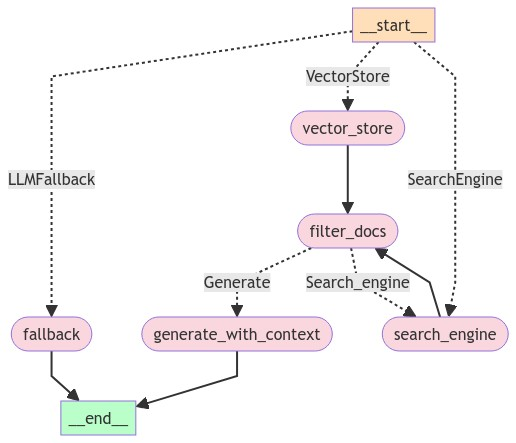

In [101]:
from io import BytesIO
from PIL import Image
from IPython.display import display

img = Image.open(BytesIO(plot))
display(img)